<a href="https://colab.research.google.com/github/Manjunath727/DL/blob/master/3_LinearRegression/7_ElasticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step #250 A = [[-0.04200628]
 [ 0.65301186]
 [ 1.4042546 ]] b = [[1.3802404]]
Loss = [4.4377637]
Step #500 A = [[0.4864507 ]
 [0.36107838]
 [0.9743546 ]] b = [[1.5602808]]
Loss = [1.5238596]
Step #750 A = [[0.65230554]
 [0.3062206 ]
 [0.7187788 ]] b = [[1.6652322]]
Loss = [1.1375144]
Step #1000 A = [[0.6941627 ]
 [0.3200184 ]
 [0.54077965]] b = [[1.7415982]]
Loss = [0.9732612]


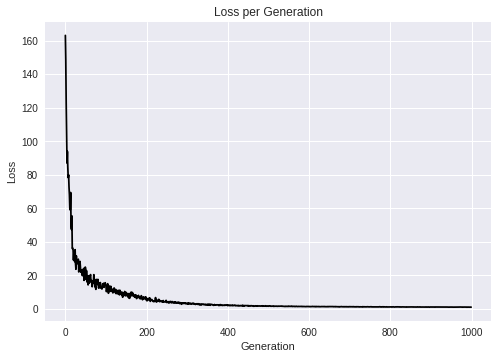

In [5]:
# Elastic Net Regression
# Combination of Lasso + Ridge regression with L1 and L2 regularization

# Load necessary libraries and intialize graphs
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
sess = tf.Session()

# load data. each element of x_data will have 3 values
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# Declare batch_size, placeholders, variables and model_outpus
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

# Declare L1 and L2 norms of partial slopes. Add them to loss function
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

#initializer, declare optimizer, adn run training loop
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)
loss_vec=[]
for i in range(1000):
  rand_index = np.random.choice(len(x_vals), size=batch_size)
  rand_x = x_vals[rand_index]
  rand_y = np.transpose([y_vals[rand_index]])
  sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
  temp_loss = sess.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
  loss_vec.append(temp_loss[0])
  if (i+1)%250 == 0 :
    print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
    print("Loss = " + str(temp_loss))

    
#  Plot
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()
